<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


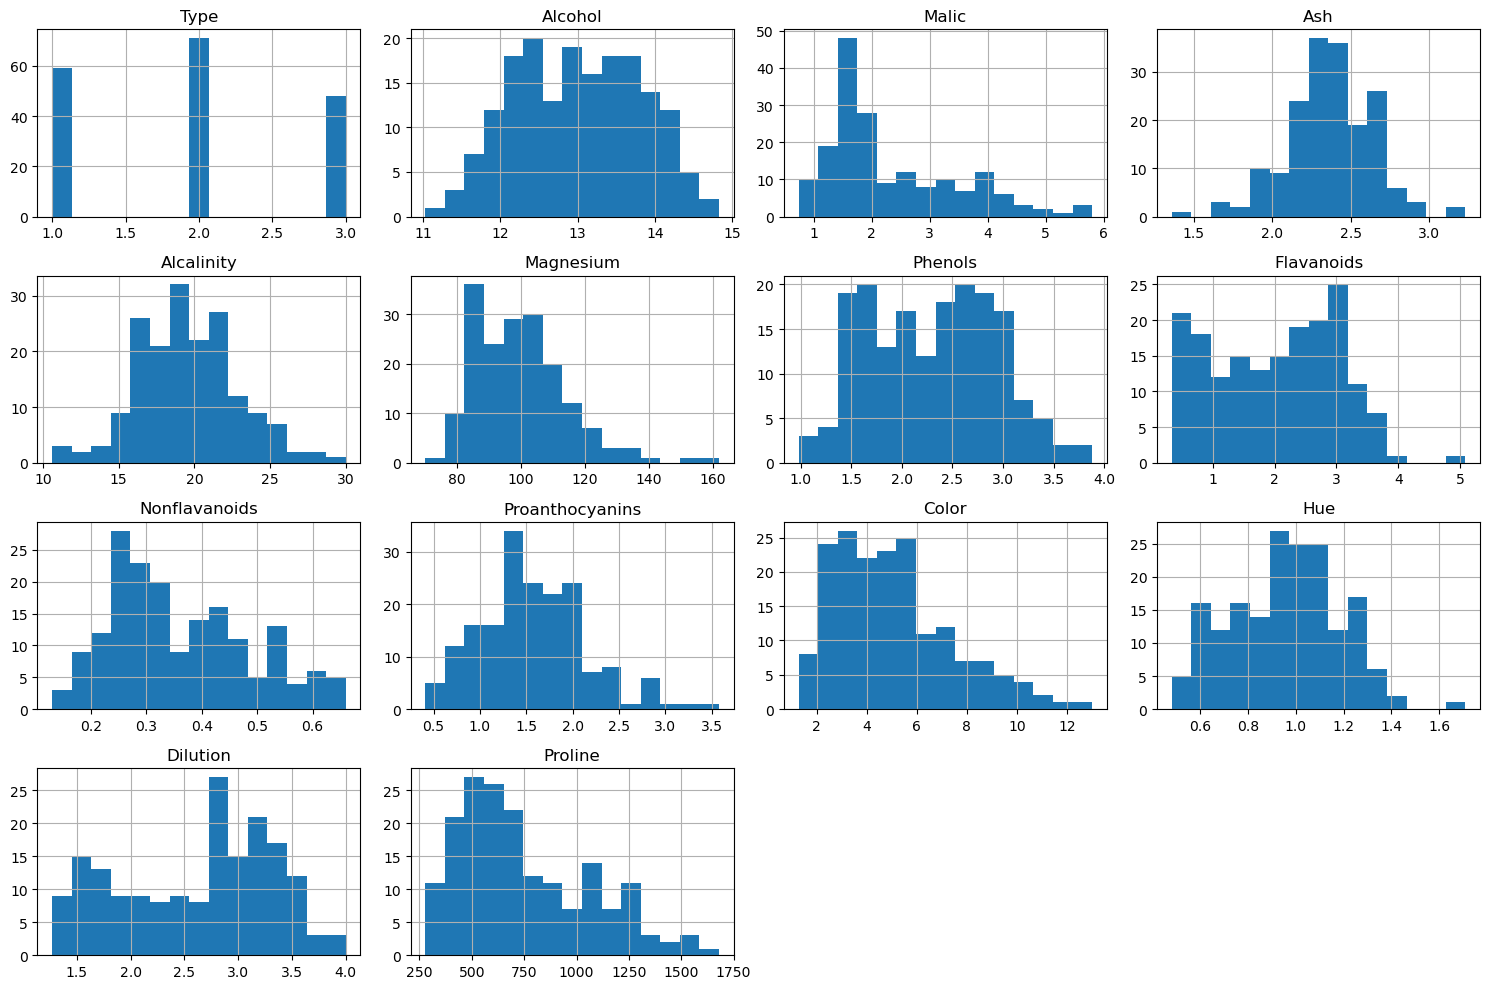

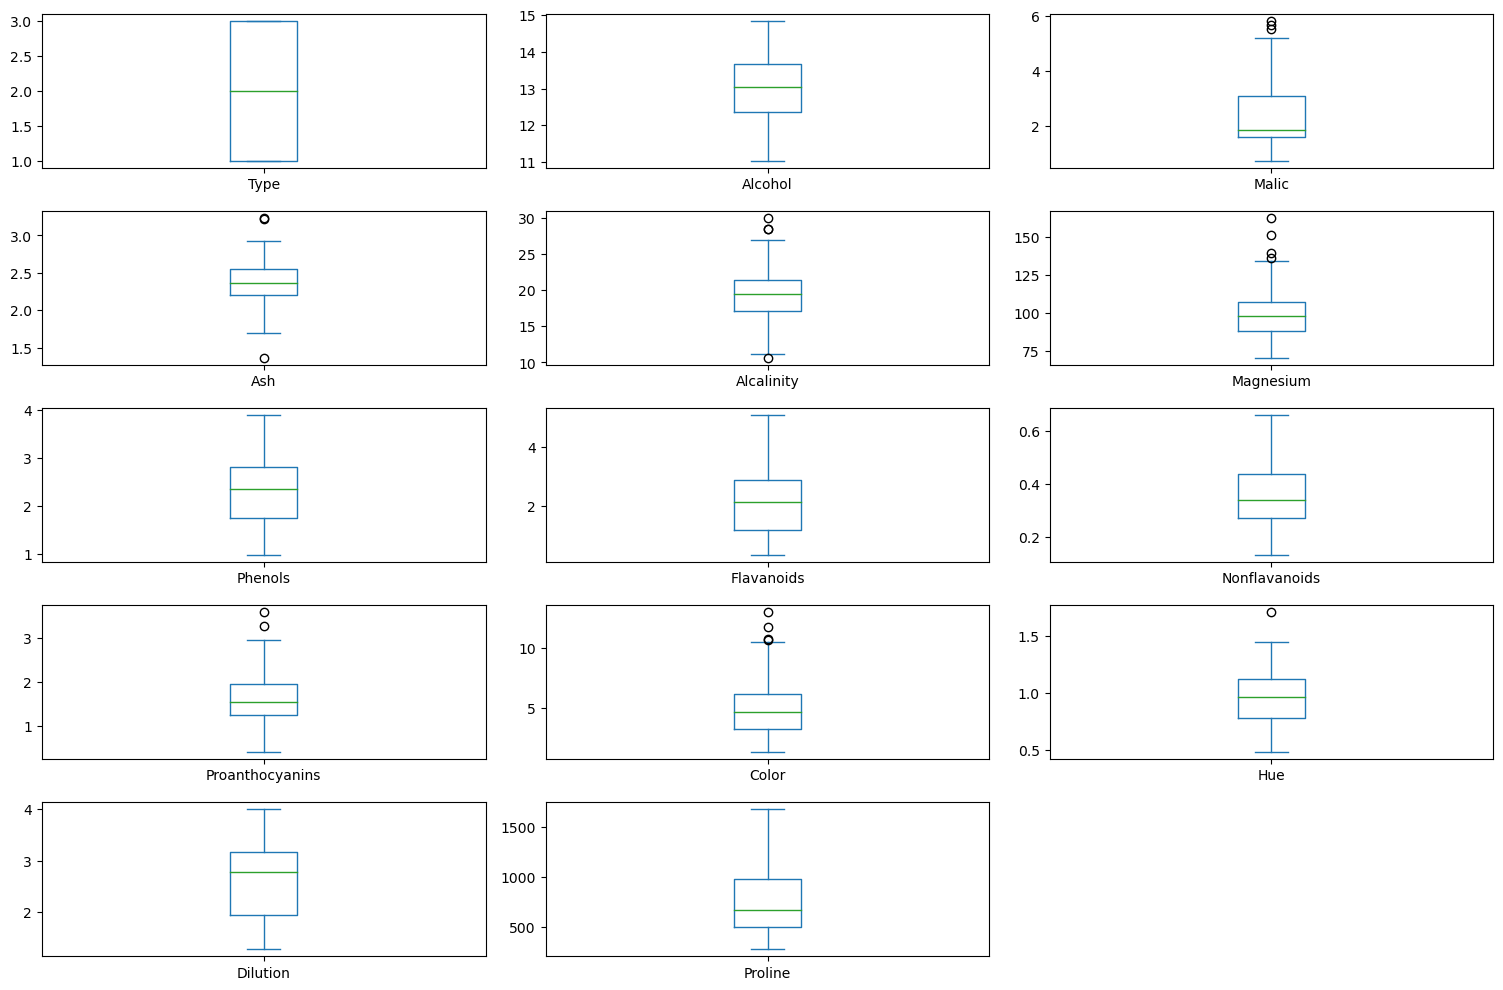

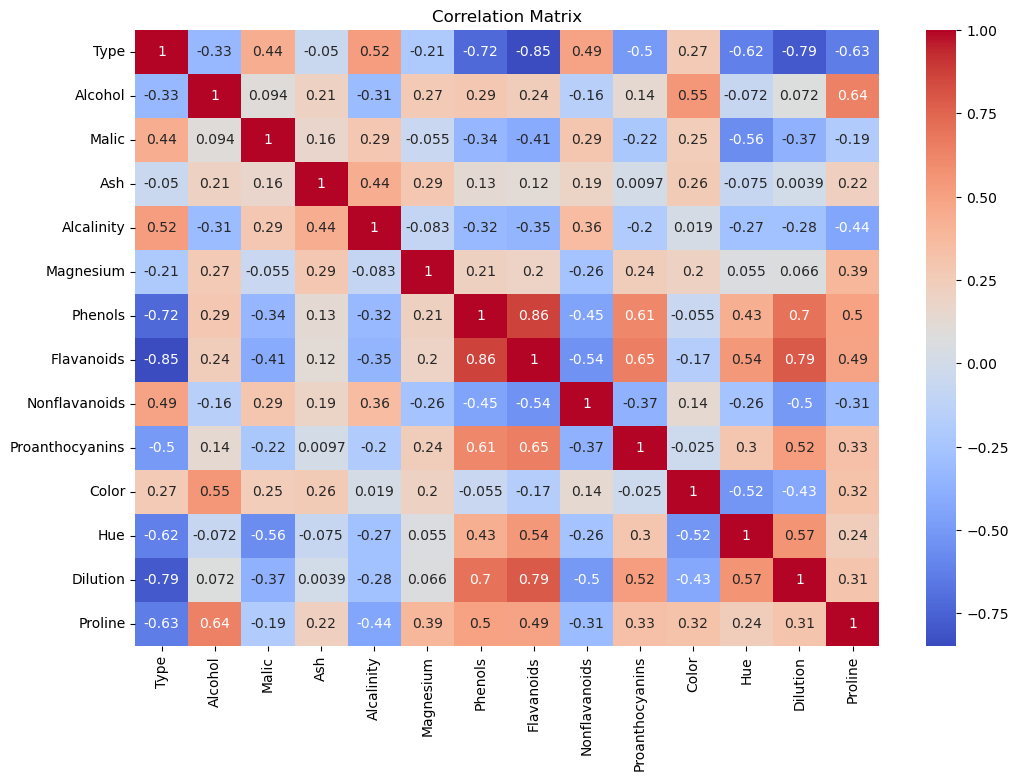

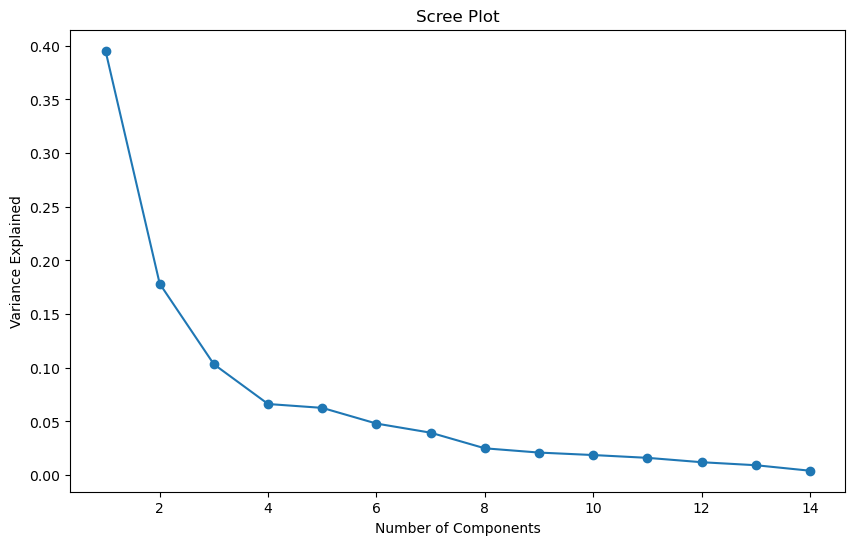

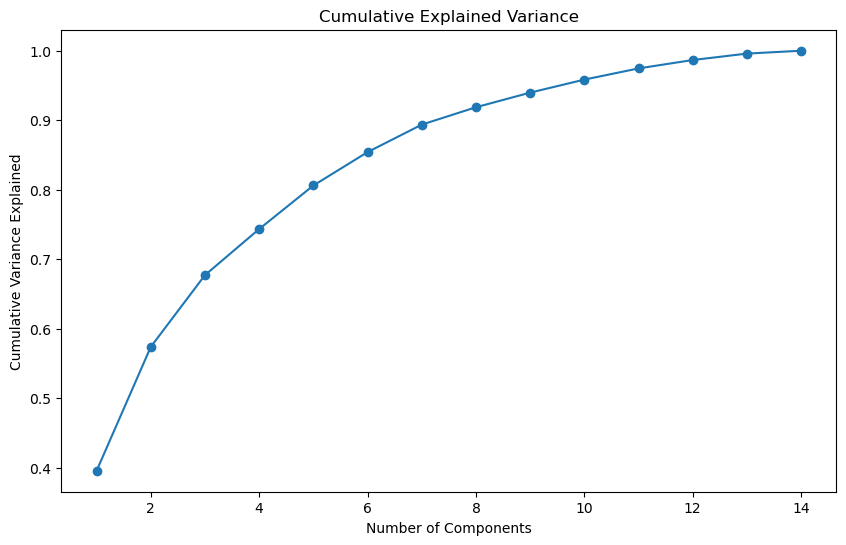

Number of components that explain 95% of the variance: 10


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


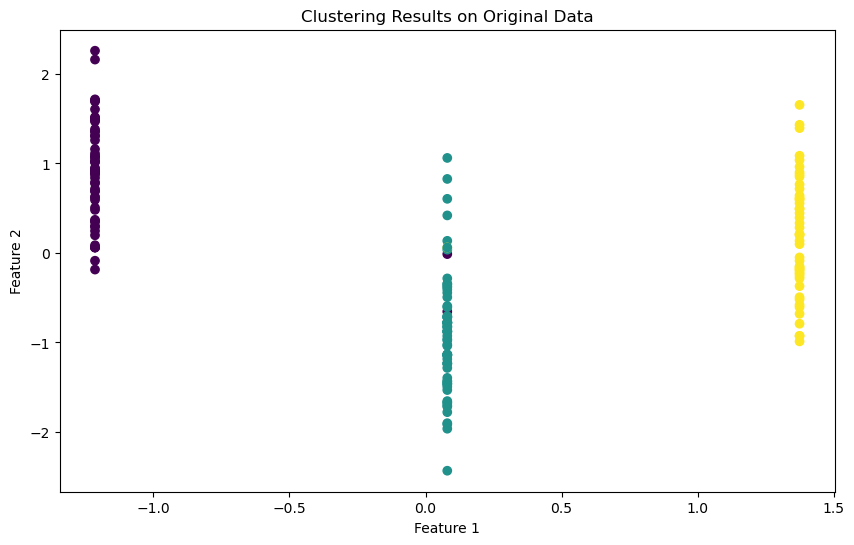

Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


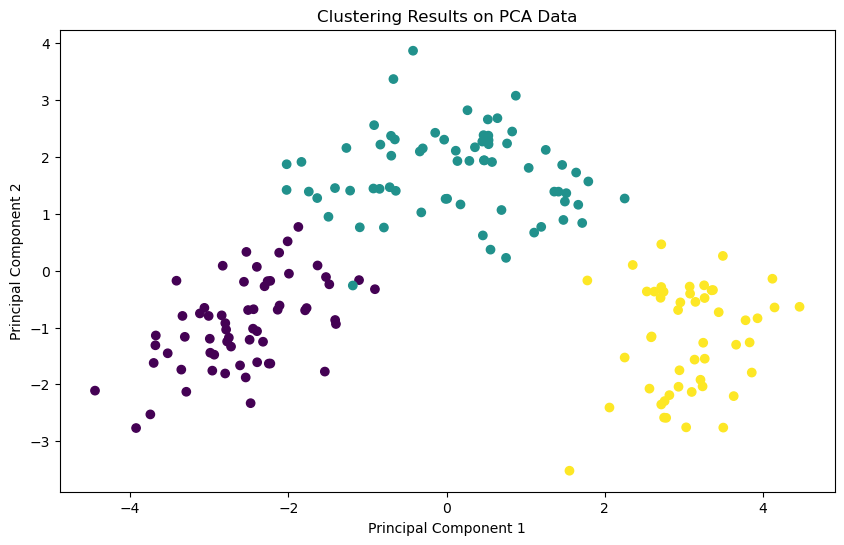

Silhouette Score (PCA Data): 0.324065820533119
Davies-Bouldin Index (PCA Data): 1.2584890242254965
Clustering performance on original data: Silhouette Score = 0.30773604383565206, Davies-Bouldin Index = 1.3163957434114109
Clustering performance on PCA data: Silhouette Score = 0.324065820533119, Davies-Bouldin Index = 1.2584890242254965
Conclusion and Insights:
1. PCA reduced the dimensionality of the dataset while retaining most of the variance.
2. Clustering performance on PCA-transformed data was comparable to the original data.
3. Using PCA can simplify the data and improve clustering efficiency without significantly compromising performance.
4. PCA is recommended when dealing with high-dimensional data to reduce complexity and computational cost.


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 2: Load the dataset
data = pd.read_csv('wine.csv')

# Step 3: Exploratory Data Analysis (EDA)
# Display basic information and statistics
data.info()
data.describe()

# Histograms for feature distributions
data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots for feature distributions
data.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 4: Dimensionality Reduction with PCA
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Scree plot to determine the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance')
plt.show()

# Select the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components}')

# Transform the original dataset into principal components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Step 5: Clustering with Original Data
# Apply K-means clustering to the original dataset
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(scaled_data)
labels_original = kmeans_original.labels_

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_original, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results on Original Data')
plt.show()

# Evaluate clustering performance
silhouette_original = silhouette_score(scaled_data, labels_original)
davies_bouldin_original = davies_bouldin_score(scaled_data, labels_original)
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original}')

# Step 6: Clustering with PCA Data
# Apply K-means clustering to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_data)
labels_pca = kmeans_pca.labels_

# Visualize the clustering results obtained from PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_pca, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results on PCA Data')
plt.show()

# Evaluate clustering performance
silhouette_pca = silhouette_score(pca_data, labels_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data, labels_pca)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

# Step 7: Comparison and Analysis
# Compare the clustering results obtained from the original dataset and PCA-transformed data
print(f'Clustering performance on original data: Silhouette Score = {silhouette_original}, Davies-Bouldin Index = {davies_bouldin_original}')
print(f'Clustering performance on PCA data: Silhouette Score = {silhouette_pca}, Davies-Bouldin Index = {davies_bouldin_pca}')

# Step 8: Conclusion and Insights
# Summarize the key findings and insights
print("Conclusion and Insights:")
print("1. PCA reduced the dimensionality of the dataset while retaining most of the variance.")
print("2. Clustering performance on PCA-transformed data was comparable to the original data.")
print("3. Using PCA can simplify the data and improve clustering efficiency without significantly compromising performance.")
print("4. PCA is recommended when dealing with high-dimensional data to reduce complexity and computational cost.")
